In [4]:
import operator
import os

import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from tools.common_methods import get_train_test_data

In [5]:
X_train, X_test, y_train, y_test = get_train_test_data()
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
directory = '../saved_models'

r2_res = {}
mse_res = {}

for filename in os.scandir(directory):
    loaded_model = joblib.load(filename.path)
    if filename.name == 'ridge.sav':
        test_data = X_test.drop(columns=['Середній пріоритет рекомендованих', 'Рекомендовано за співбесідою',
                                         'Регіональний коефіцієнт'])
    elif filename.name.endswith('regressor.sav'):
        test_data = X_test_std
    else:
        test_data = X_test

    y_pred = loaded_model.predict(test_data)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    r2_res[filename.name.split('.')[0]] = r2
    mse_res[filename.name.split('.')[0]] = mse

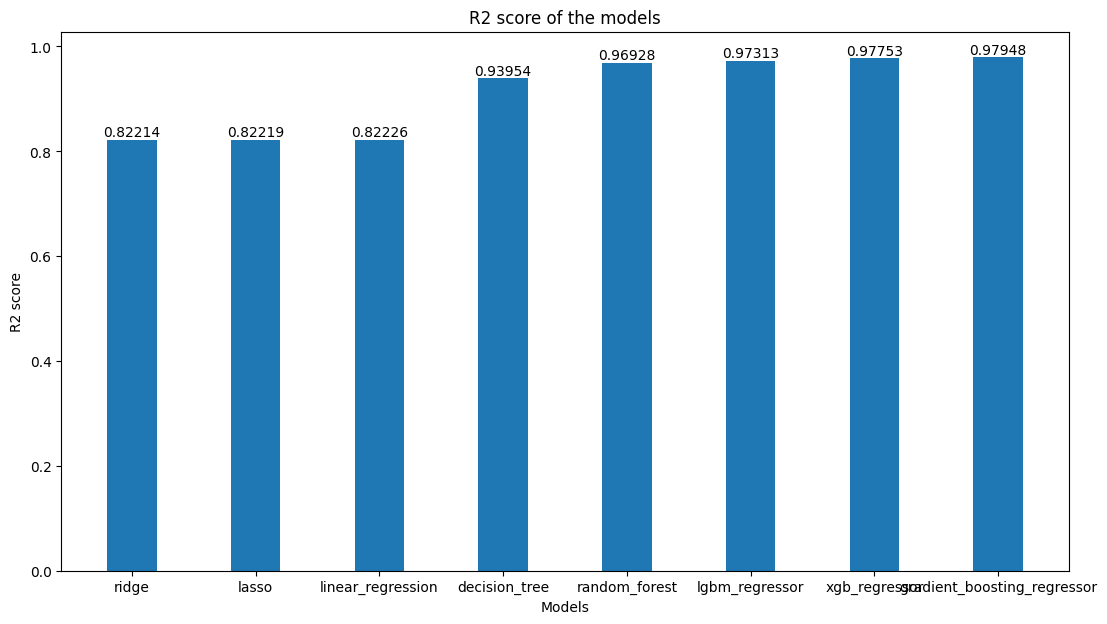

In [7]:
r2_res = dict(sorted(r2_res.items(), key=operator.itemgetter(1)))
models_r2 = list(r2_res.keys())
values_r2 = list(r2_res.values())

fig = plt.figure(figsize=(13, 7))

cont = plt.bar(models_r2, values_r2, width=0.4)
plt.bar_label(cont, fmt='%.5f')
plt.xlabel("Models")
plt.ylabel("R2 score")
plt.title("R2 score of the models")
plt.show()

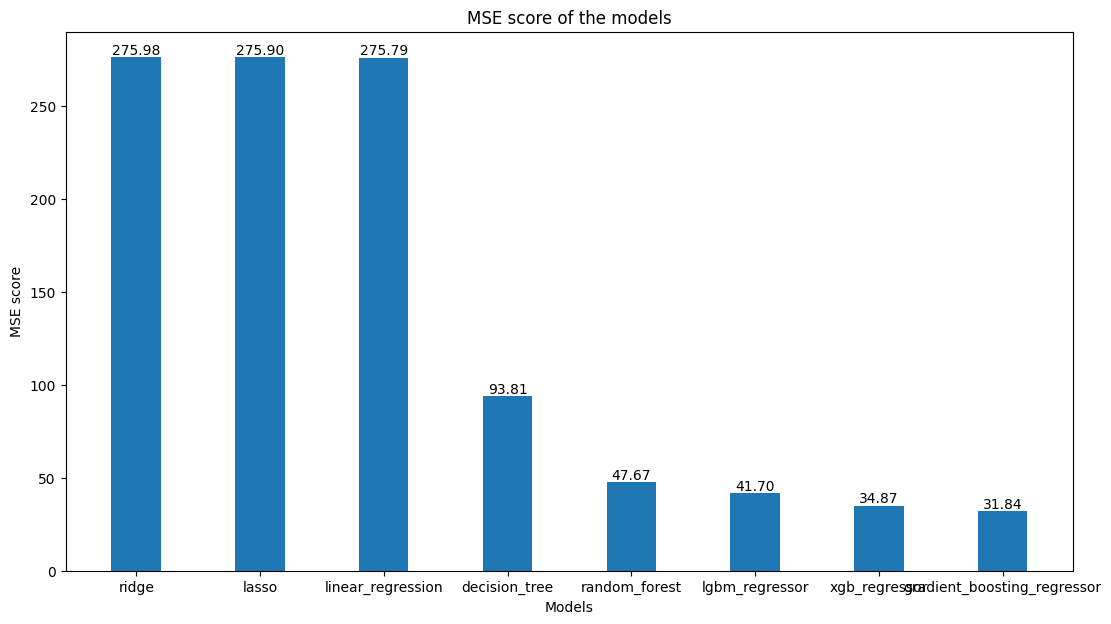

In [8]:
mse_res = dict(sorted(mse_res.items(), key=operator.itemgetter(1), reverse=True))
models_mse = list(mse_res.keys())
values_mse = list(mse_res.values())

fig = plt.figure(figsize=(13, 7))

cont = plt.bar(models_mse, values_mse, width=0.4)
plt.bar_label(cont, fmt='%.2f')
plt.xlabel("Models")
plt.ylabel("MSE score")
plt.title("MSE score of the models")
plt.show()

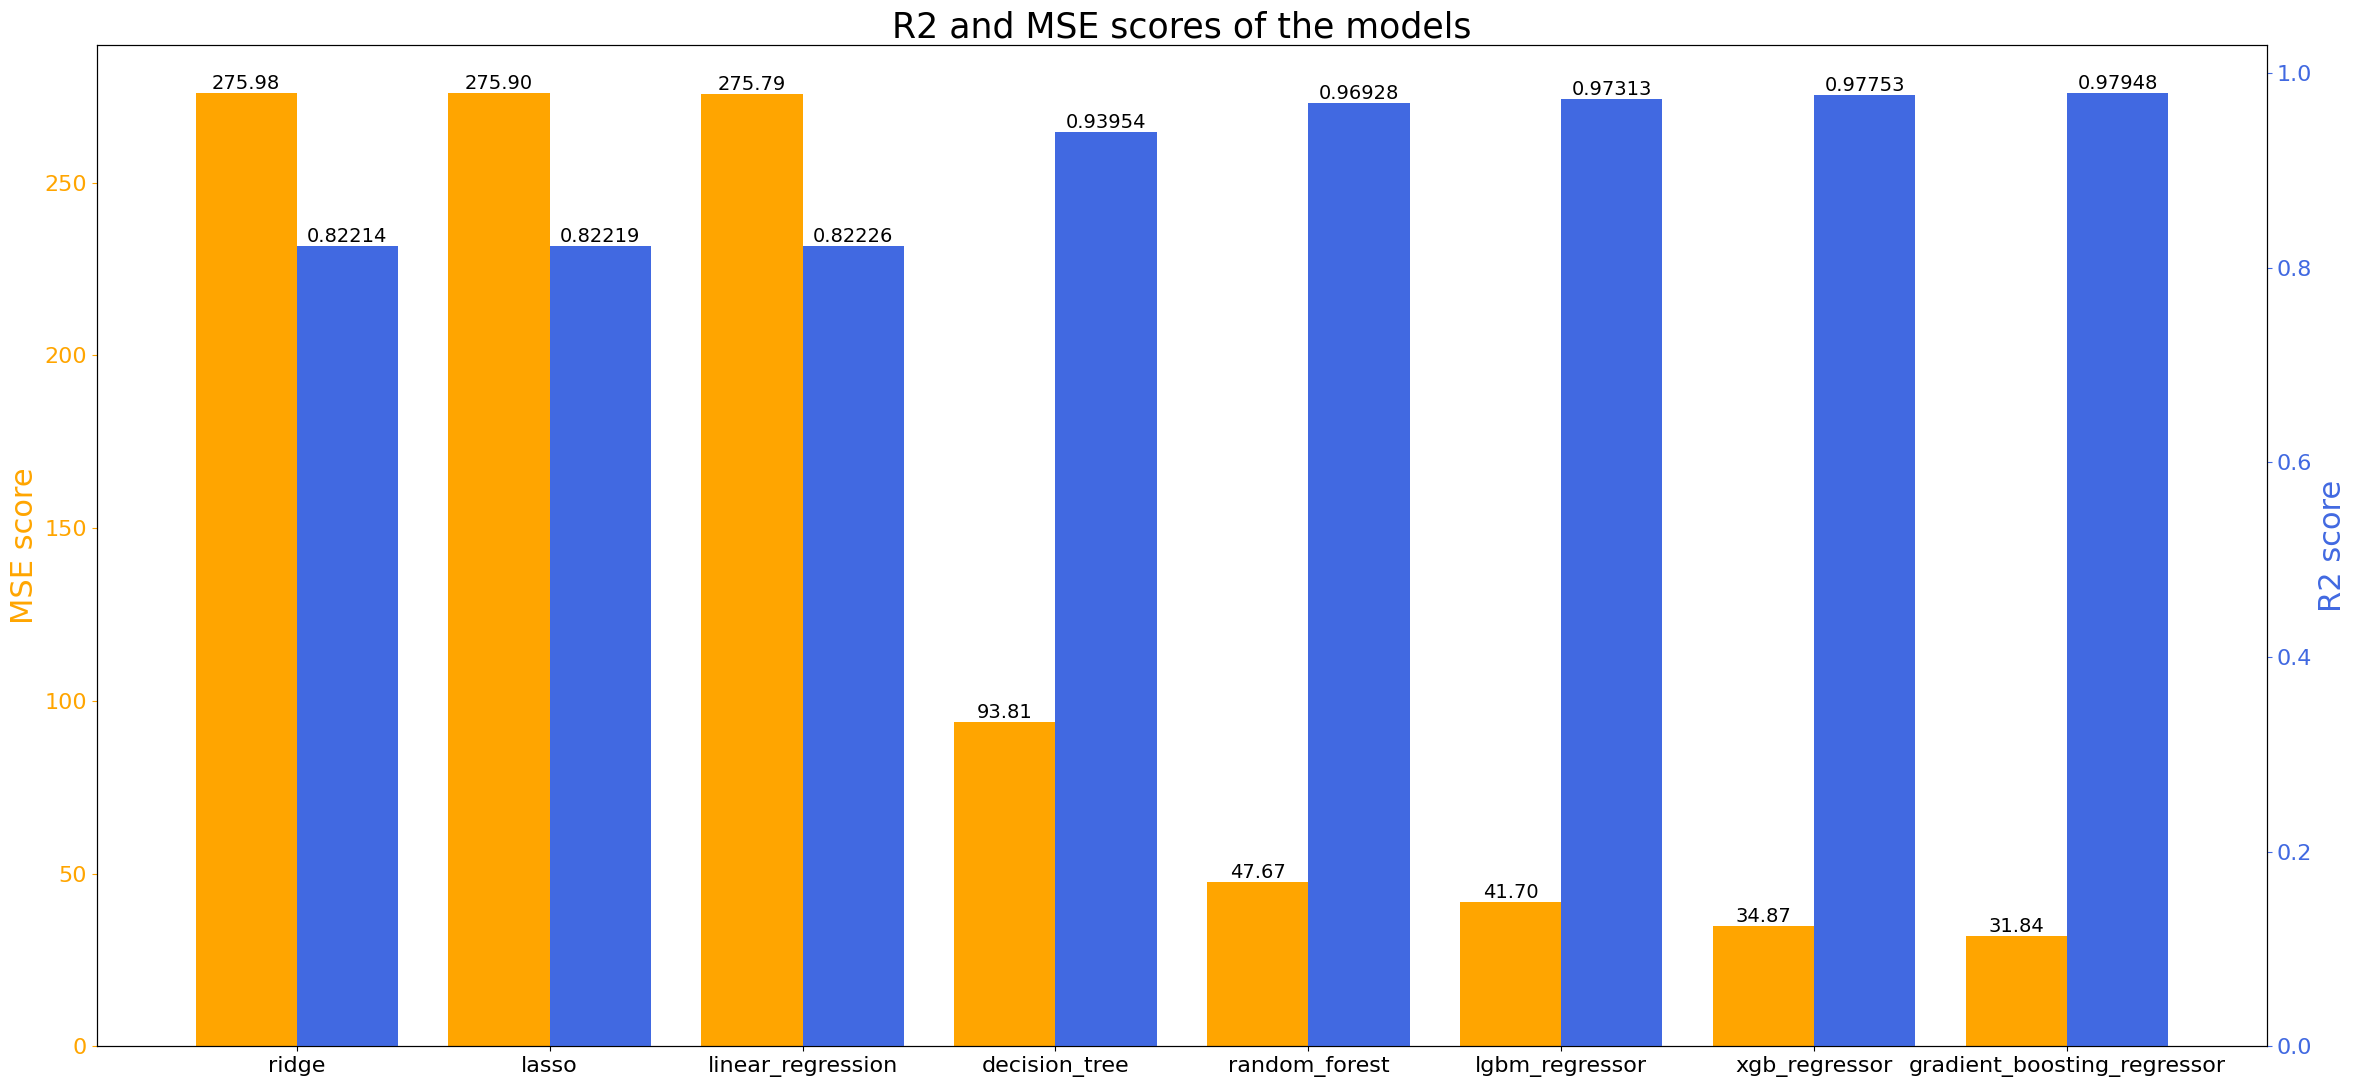

In [9]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(28, 13))
ax2 = ax.twinx()
ax.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)

mse_color = 'orange'
cont = ax.bar(models_mse, values_mse, width=-0.4, align='edge', color=mse_color)
ax.bar_label(cont, fmt='%.2f')
ax.set_ylabel("MSE score", color=mse_color, fontsize=22)
ax.tick_params('y', colors=mse_color)

r2_color = 'royalblue'
cont2 = ax2.bar(models_r2, values_r2, width=0.4, align='edge', color=r2_color)
ax2.bar_label(cont2, fmt='%.5f')
ax2.set_ylabel("R2 score", color=r2_color, fontsize=22)
ax2.tick_params('y', colors=r2_color)

plt.title("R2 and MSE scores of the models", fontsize=25)
plt.savefig('r2_and_mse.png')
plt.show()